In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:\datascience\Copy of diabetes (1) (2).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
x=df.iloc[:,0:8]
y=df['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
from sklearn.feature_selection import SelectKBest
bestfeatures=SelectKBest(k=6)
fit=bestfeatures.fit(x,y)
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
fs=pd.concat([dfcolumns,dfscore],axis=1)
fs.columns=['spec','score']
print(fs)

                       spec       score
0               Pregnancies   39.670227
1                   Glucose  213.161752
2             BloodPressure    3.256950
3             SkinThickness    4.304381
4                   Insulin   13.281108
5                       BMI   71.772072
6  DiabetesPedigreeFunction   23.871300
7                       Age   46.140611


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
print(x_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [10]:
from sklearn import tree
#import decision tree classsifier
dt=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.7337662337662337


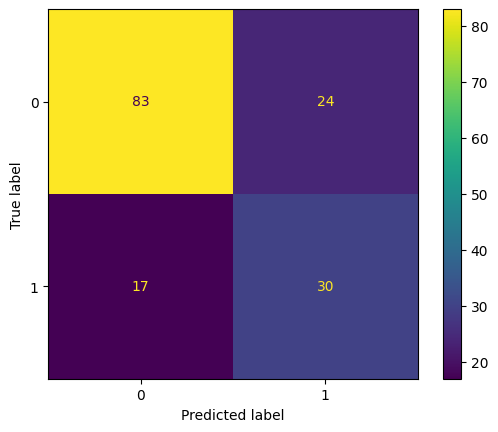

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [13]:
y_pred=dt.predict([[5,7,135,45,160,44,3,35]])
y_pred

array([0], dtype=int64)

[Text(0.46, 0.9, 'Glucose <= 0.082\nentropy = 0.943\nsamples = 614\nvalue = [393, 221]\nclass = 0'),
 Text(0.22, 0.7, 'BMI <= -0.728\nentropy = 0.69\nsamples = 352\nvalue = [287, 65]\nclass = 0'),
 Text(0.08, 0.5, 'DiabetesPedigreeFunction <= 0.628\nentropy = 0.083\nsamples = 97\nvalue = [96, 1]\nclass = 0'),
 Text(0.04, 0.3, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]\nclass = 0'),
 Text(0.12, 0.3, 'DiabetesPedigreeFunction <= 0.718\nentropy = 0.31\nsamples = 18\nvalue = [17, 1]\nclass = 0'),
 Text(0.08, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.16, 0.1, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = 0'),
 Text(0.36, 0.5, 'Age <= -0.424\nentropy = 0.813\nsamples = 255\nvalue = [191, 64]\nclass = 0'),
 Text(0.28, 0.3, 'BMI <= -0.159\nentropy = 0.549\nsamples = 134\nvalue = [117, 17]\nclass = 0'),
 Text(0.24, 0.1, 'entropy = 0.162\nsamples = 42\nvalue = [41, 1]\nclass = 0'),
 Text(0.32, 0.1, 'entropy = 0.667\nsamples = 92\nvalue = [76, 16]\nclass =

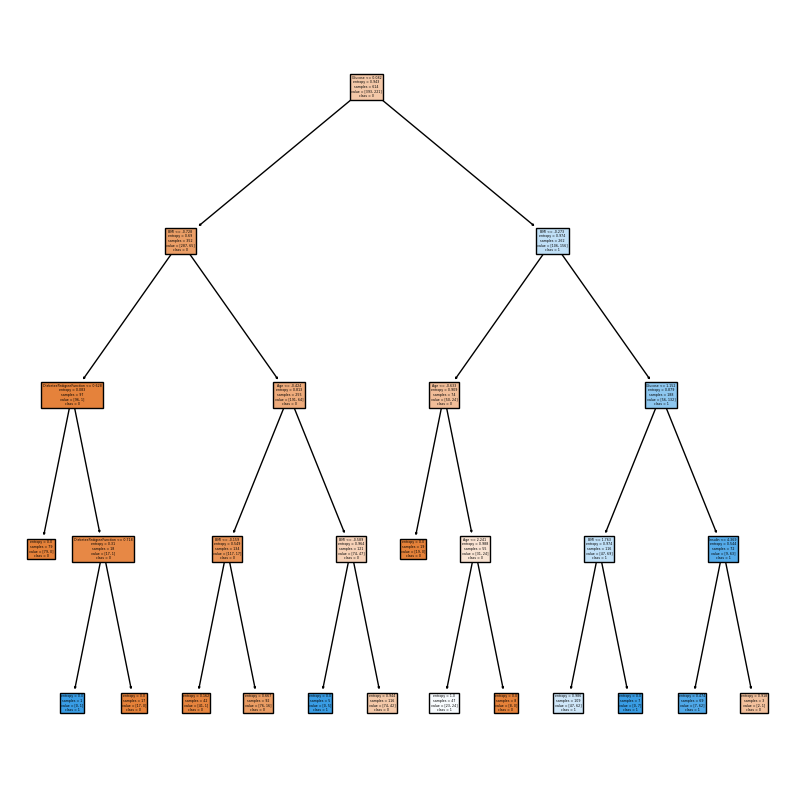

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
       'BMI','DiabetesPedigreeFunction','Age','Outcome'],class_names=['0','1'],filled=True)